In [6]:
import numpy as np
import matplotlib.pyplot as plt 

# Semilla para reproducibilidad (igual que en ejemplos clasicos)
np.random.seed(42)

print("librerias cargadas. ¡listo para el experimento de bias-variance!")


librerias cargadas. ¡listo para el experimento de bias-variance!


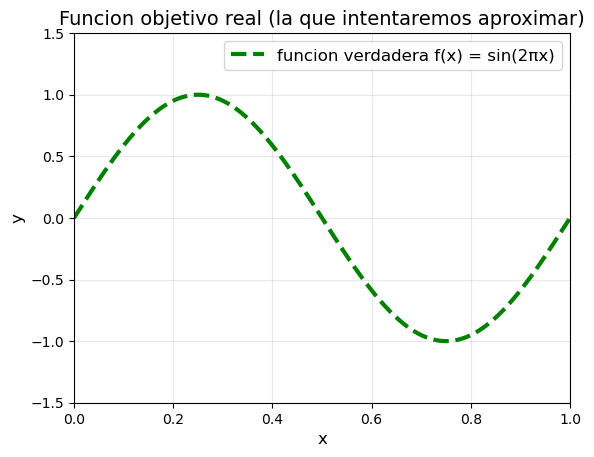

In [8]:
def funcion_verdadera(x):
    return np.sin(2 * np.pi * x)

# Generemos 1000 puntos equivalentes en [0, 1] para evaluar con alta precision
x_test = np.linspace(0, 1, 1000)
y_test_verdadero = funcion_verdadera(x_test)

# Grafiquemos la funcion verdadera
plt.Figure(figsize=(10, 6))
plt.plot(x_test, y_test_verdadero, 'g--', linewidth=3, label='funcion verdadera f(x) = sin(2πx)')
plt.title('Funcion objetivo real (la que intentaremos aproximar)',fontsize=14)
plt.xlabel('x', fontsize=12)
plt.ylabel('y', fontsize=12)
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3)
plt.xlim(0, 1)
plt.ylim(-1.5, 1.5)
plt.show()



In [9]:
# Parametros del experimento (igual que en el libro)
N_train = 20               # Puntos por dataset de entrenamiento
N_simulaciones = 200       # Numero de dataset simulados (mientras mas, mas suave la curva)
sigma_ruido = 1.0          # Desviacion estandar del ruido gaussiano (controla cuanto ruido hay)

# Diccionario para guardar las predicciones de cada modelo en cada simulacion
# clave: grado de polinomio, valor: array (N_simulaciones, 1000) con predicciones en x_test
predicciones_por_grado = {}

# Lista para guardar el MSE promedio por grado (para plotear despues)
mse_promedio = []
bias_cuadrado = []
variance = []

print(f"Comenzando simulacion de {N_simulaciones} datasets con {N_train} puntos cada uno...")


Comenzando simulacion de 200 datasets con 20 puntos cada uno...


In [10]:
for grados in range(1, 15):  # Grados 1 a 14
    predicciones_simulacion = []  
    
    for sim in range(N_simulaciones):
        # Generar datos de entrenamiento
        x_train = np.random.uniform(0, 1, N_train)
        y_train = funcion_verdadera(x_train) + np.random.normal(0, sigma_ruido, N_train)
        
        # Matriz de diseño para entrenamiento (polinomial)
        X_train = np.vander(x_train, grados + 1, increasing=True)  # columnas: 1, x, x², ..., x^grado
        
        # Mínimos cuadrados (estable numéricamente)
        betas = np.linalg.lstsq(X_train, y_train, rcond=None)[0]
        
        # Matriz de diseño para test (¡NO sobrescribimos x_test!)
        X_test_poly = np.vander(x_test, grados + 1, increasing=True)
        
        # Predicción en todos los puntos de test
        y_pred = X_test_poly @ betas
        predicciones_simulacion.append(y_pred)
    
    # Convertir a array: (200 simulaciones, 1000 puntos)
    predicciones_simulacion = np.array(predicciones_simulacion)
    predicciones_por_grado[grados] = predicciones_simulacion
    
    # Promedio de las predicciones (la "curva esperada" del modelo)
    y_pred_promedio = np.mean(predicciones_simulacion, axis=0)
    
    # Bias²: cuánto se desvía en promedio el modelo de la verdad
    bias_cuadrado.append(np.mean((y_pred_promedio - y_test_verdadero)**2))
    
    # Variance: cuánto varían las predicciones entre simulaciones
    variance.append(np.mean(np.var(predicciones_simulacion, axis=0)))
    
    # MSE de prueba esperado
    mse_promedio.append(np.mean(np.mean((predicciones_simulacion - y_test_verdadero)**2, axis=0)))

print("¡Simulación completa! Ya tenemos bias², variance y MSE para cada grado.")
        

¡Simulación completa! Ya tenemos bias², variance y MSE para cada grado.


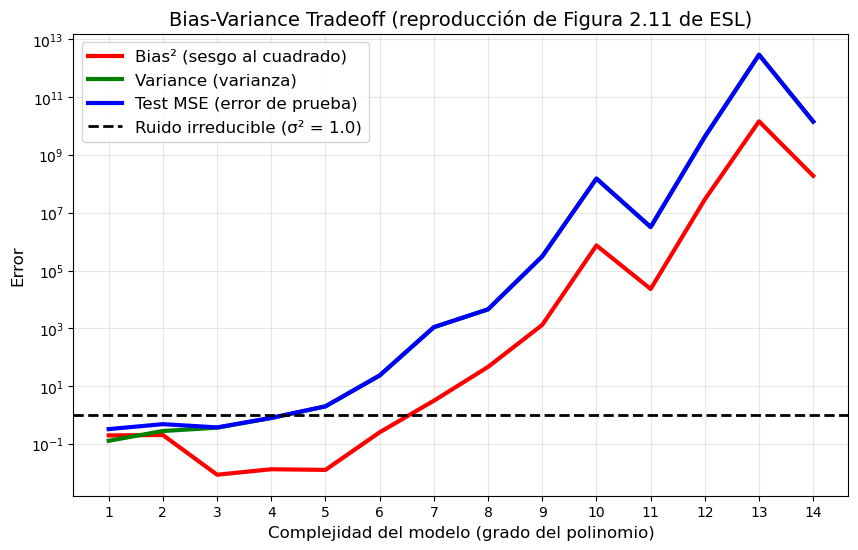

In [11]:
grados = list(range(1, 15))

plt.figure(figsize=(10, 6))
plt.plot(grados, bias_cuadrado, 'r-', linewidth=3, label='Bias² (sesgo al cuadrado)')
plt.plot(grados, variance, 'g-', linewidth=3, label='Variance (varianza)')
plt.plot(grados, mse_promedio, 'b-', linewidth=3, label='Test MSE (error de prueba)')
plt.axhline(y=sigma_ruido**2, color='k', linestyle='--', linewidth=2, label=f'Ruido irreducible (σ² = {sigma_ruido**2})')
plt.title('Bias-Variance Tradeoff (reproducción de Figura 2.11 de ESL)', fontsize=14)
plt.xlabel('Complejidad del modelo (grado del polinomio)', fontsize=12)
plt.ylabel('Error', fontsize=12)
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3)
plt.yscale('log')  # Escala logarítmica para ver mejor el crecimiento explosivo
plt.xticks(grados)
plt.show()